In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("transactions.csv")  # Replace with your dataset path
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check for missing values


   TransactionID             TransactionDate   Amount  MerchantID  \
0              1  2024-04-03 14:15:35.462794  4189.27         688   
1              2  2024-03-19 13:20:35.462824  2659.71         109   
2              3  2024-01-08 10:08:35.462834   784.00         394   
3              4  2024-04-13 23:50:35.462850  3514.40         944   
4              5  2024-07-12 18:51:35.462858   369.07         475   

  TransactionType      Location  IsFraud  
0          refund   San Antonio        0  
1          refund        Dallas        0  
2        purchase      New York        0  
3        purchase  Philadelphia        0  
4        purchase       Phoenix        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 n

In [2]:
# Convert TransactionDate to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [6]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder = LabelEncoder()
df['TransactionType'] = encoder.fit_transform(df['TransactionType'])
df['Location'] = encoder.fit_transform(df['Location'])

In [7]:
# Standardizing numerical features
scaler = StandardScaler()
df[['Amount', 'MerchantID']] = scaler.fit_transform(df[['Amount', 'MerchantID']])

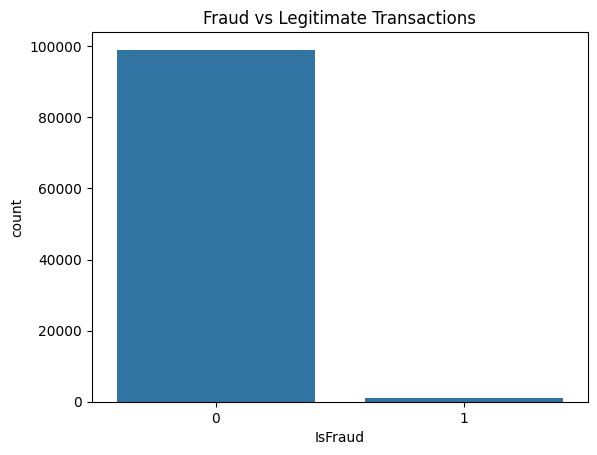

In [8]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='IsFraud', data=df)
plt.title("Fraud vs Legitimate Transactions")
plt.show()

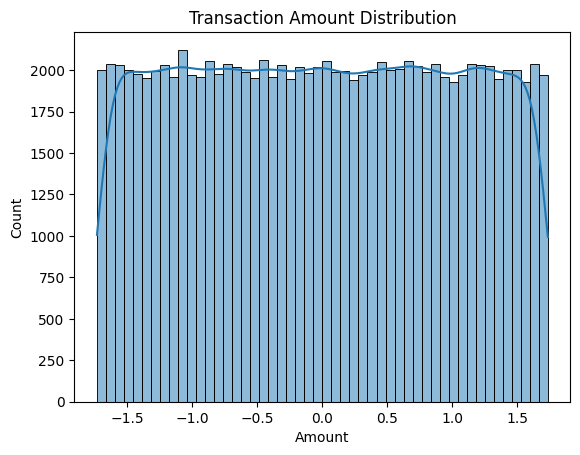

In [9]:
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

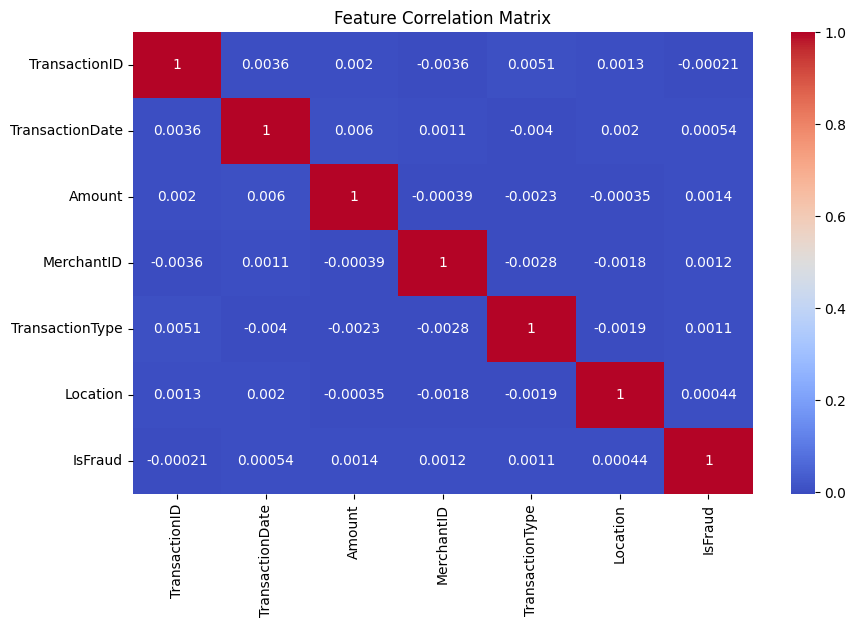

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [11]:
# Splitting data & handling imbalance
X = df.drop(columns=['TransactionID', 'TransactionDate', 'IsFraud'])
y = df['IsFraud']

In [12]:
# Define SMOTE instance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [13]:
# Model training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Predictions
y_pred = model.predict(X_test)

In [15]:
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[16329  3448]
 [ 2028 17795]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86     19777
           1       0.84      0.90      0.87     19823

    accuracy                           0.86     39600
   macro avg       0.86      0.86      0.86     39600
weighted avg       0.86      0.86      0.86     39600

Accuracy Score: 0.8617171717171718


In [16]:
import joblib

# Save model
joblib.dump(model, "fraud_detection_model.pkl")


['fraud_detection_model.pkl']

In [18]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Encode categorical variables
encoder_transaction_type = LabelEncoder()
df["TransactionType"] = encoder_transaction_type.fit_transform(df["TransactionType"])

encoder_location = LabelEncoder()
df["Location"] = encoder_location.fit_transform(df["Location"])

# Save encoders for later use in Flask API
joblib.dump(encoder_transaction_type, "encoder_transaction_type.pkl")
joblib.dump(encoder_location, "encoder_location.pkl")

# Train your model (example)
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Replace with your model
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "fraud_detection_model.pkl")
print("✅ Model training completed and saved as fraud_detection_model.pkl!")

✅ Model training completed and saved as fraud_detection_model.pkl!
